In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

import sys
sys.path.append("..")
from encoder_learning_benchmarks import optimizers, common, datasets, networks, rules, benchmark

In [14]:
rng = np.random.RandomState(48911)
n_dim_hidden = 100

opt = optimizers.adam.manifest.ctor()
#opt = optimizers.sgd.manifest.ctor(eta=0.728e2)

dset = datasets.multiplication.manifest.ctor(biased=False, skewed=False, rng=rng)
#dset = datasets.gaussian_clusters.manifest.ctor(rng=rng, biased=True)
#dset = datasets.mnist.manifest.ctor(rng=rng)

net = networks.perceptron.manifest.ctor(dset.n_dim_in, n_dim_hidden, initialisation="nef", rng=rng)

#dec_rule = rules.pes.manifest.ctor(n_dim_hidden, dset.n_dim_out, rng=rng)
dec_rule = rules.lstsq.manifest.ctor(n_dim_hidden, dset.n_dim_out, rng=rng)

#enc_rule = rules.backprop.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, rng=rng)
enc_rule = rules.feedback_alignment.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, rng=rng)
#enc_rule = rules.voja.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, rng=rng, learn_gains=True, kappa=1e-4)
#enc_rule = None

In [16]:
res = benchmark.run_single_trial(opt, dset, net, dec_rule, enc_rule, n_epochs=200, batch_size=100, compute_test_error=True, rng=rng, sequential=False)

  200/200 (err_training=0.0479, err_validation=0.0471)


In [17]:
res

{'epochs': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176

Text(0.5, 0, 'Training Epoch')

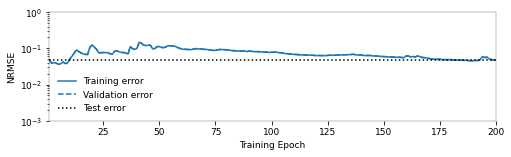

In [18]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.semilogy(res["epochs"], res["errs_training"], label="Training error")
ax.set_prop_cycle(None)
ax.semilogy(res["epochs"], res["errs_validation"], label="Validation error", linestyle='--')
if not res["err_test"] is None:
    ax.axhline(res["err_test"], label="Test error", linestyle=":", color="k")
ax.legend()
ax.set_xlim(1, res["n_epochs"])
ax.set_ylim(1e-3, 1)
ax.set_ylabel("Error rate" if dset.is_classification_dataset else "NRMSE")
ax.set_xlabel("Training Epoch")

In [ ]:
res

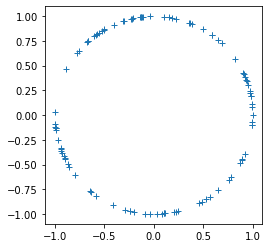

In [111]:
fig, ax = plt.subplots()
ax.plot(net.encoders[:, 0], net.encoders[:, 1], '+')
ax.set_aspect(1)

ValueError: cannot reshape array of size 2 into shape (1,1)

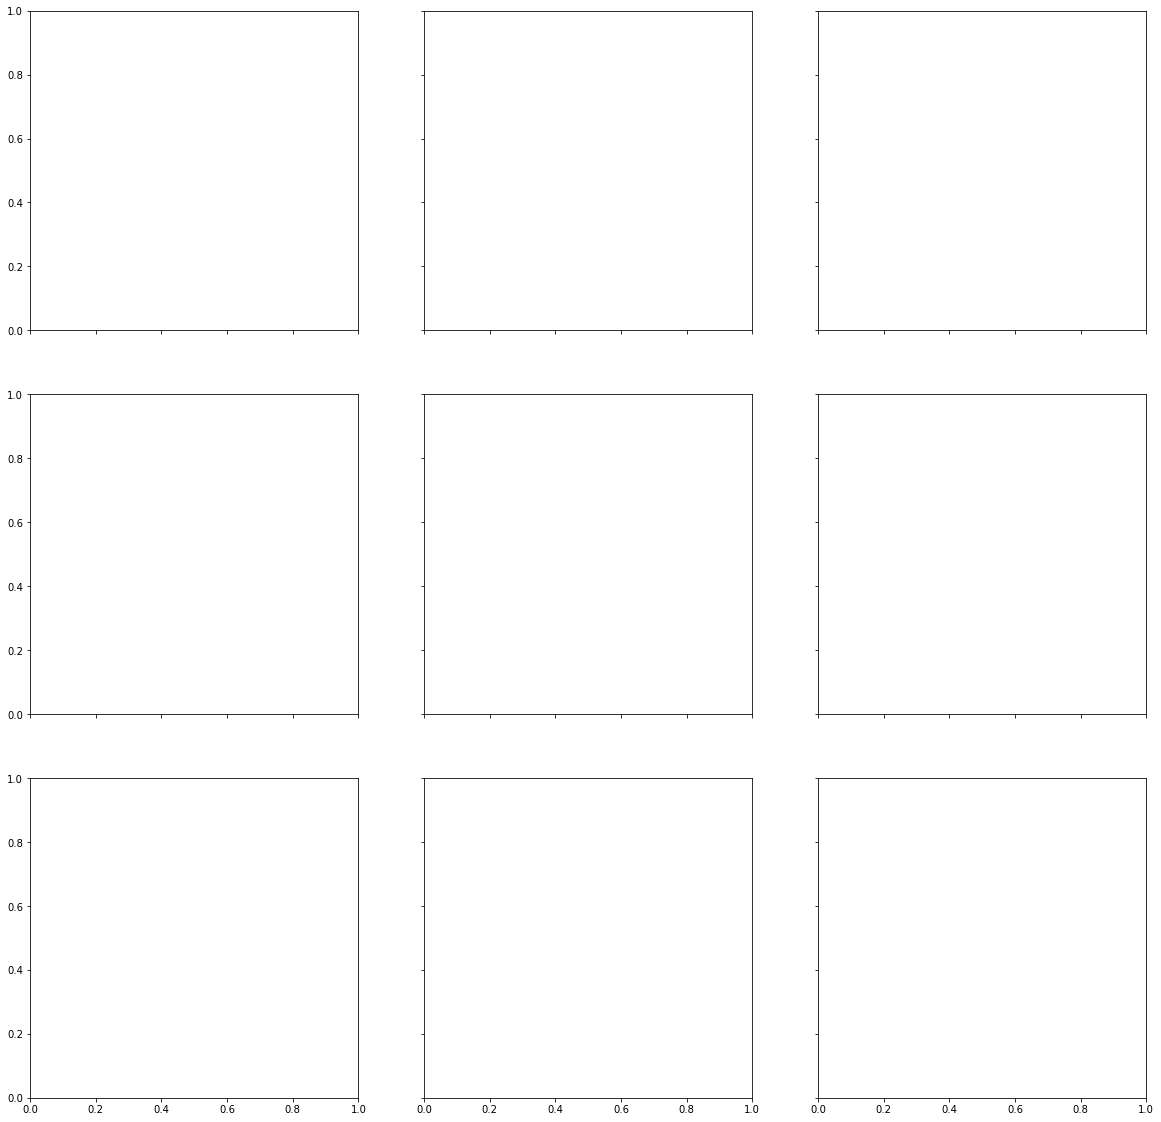

In [67]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20), sharex=True, sharey=True)
for i, ax in enumerate(axs.flatten()):
    d = int(np.sqrt(net.n_dim_in))
    ax.imshow(net.encoders[i].reshape(d, d), vmin=-0.15, vmax=0.15, cmap='RdBu')

In [42]:
n_smpls = 100
n_neurons = 10
n_dims = 3
As = np.random.randn(n_smpls, n_neurons)
xs = np.random.randn(n_smpls, n_dims)
E = np.random.randn(n_neurons, n_dims)

dE1 = np.mean(As[:, :, None] * (xs[:, None, :] - E[None, :, :]), axis=0)
#dE2 = np.mean(As[:, :, None] * xs[:, None, :] - As[:, :, None] * E[None, :, :], axis=0)
#dE2 = (As.T @ xs) / n_smpls - np.mean(As, axis=0)[:, None] * E[:, :]
dE2 = (As.T @ xs) / n_smpls - np.mean(As, axis=0)[:, None] * E[:, :]
np.max(np.abs(dE1 - dE2))

1.942890293094024e-16

In [38]:
As.shape, E.shape

((100, 10), (10, 3))